In [342]:
import matplotlib.pyplot as plt
import pandas as pd

### Import Modules

Matplotlib/Pyplot used for graphing functions

Pandas used for CSV import


In [250]:
## Building Pandas DF from CSV
dataframe = pd.read_csv('data/ramen-ratings.csv',header=0)

## Data Cleaning
df = dataframe[dataframe['Stars'] != 'Unrated']
df = df[df['Country'] != '']
df = df.replace('United States','USA')            ## United States and USA are synonymous; unifying terms.
df = df.replace('Holland','Netherlands')          ## Holland is a province of the Netherlands; unifying terms. 
df = df.replace('Sarawak','Malaysia')             ## Sarawak is a state within Malaysia; unifying terms.


## Building a Top-Ten List
df_top = df.fillna(0)
df_top = df_top[df_top['Top Ten'] != 0]

## Converting DF to Dict for application of different methods
dictionary = df.to_dict('records')
dict_top = df_top.to_dict('records')

### Import and Clean the Data

A dataframe is built from the CSV. 

This dataframe is then cleaned, removing instances where Star-Rating and Country are not provided. 

A datafram of all top-ten entries is generated for future use.

The full dataframe and top-ten dataframe are converted to dict format, so both Pandas and vanilla methods can be used. 

In [251]:
print(f"\n{dictionary[0]}\n")
print(df.iloc[0])


{'Review #': 2580, 'Brand': 'New Touch', 'Variety': "T's Restaurant Tantanmen ", 'Style': 'Cup', 'Country': 'Japan', 'Stars': '3.75', 'Top Ten': nan}

Review #                         2580
Brand                       New Touch
Variety     T's Restaurant Tantanmen 
Style                             Cup
Country                         Japan
Stars                            3.75
Top Ten                           NaN
Name: 0, dtype: object


##### Note: 

Both storage formats contain the same data. However, this data is displayed in different formats, and different methods are required to interact with them. 

In [252]:
high_star = []
for item in dictionary:
    if float(item['Stars']) >= 5:
        high_star.append(item)

low_star = []
for item in dictionary:
    if float(item['Stars']) <= .5:
        low_star.append(item)

### Building hi-lo star lists

In [ ]:
star_nations = []
all_nations = []
for i in high_star:
    star_nations.append(i['Country'])

for i in dictionary:
    all_nations.append(i['Country'])
    
print(set(all_nations))
print(set(star_nations))

### Building lists of nations with high star ratings; list of all nations

In [317]:
nation_count = df['Country'].value_counts()

### Defining Count of Nations

This is used in the pie chart, where it ends up determining the bounds for each slice. 

In [ ]:
def simplify_pie_sizes(ls):
    simplified = []
    others = []
    for i in ls:
        if i >= 100:
            simplified.append(i)
        if i <= 99:
            others.append(i)
    simplified.append(sum(others))
    return simplified

def simplify_pie_labels(ls):
    i = len(simplify_pie_sizes(list(nation_count)))
    simplified = ls[:i-1]
    simplified.append('Others')
    return simplified

### Defining 'simplified'

These functions cut the pie chart down to size. 

The first function selects any count values above 100, then sums the remainder into a 'Other' bucket. 

The second function selects the corresponding nations to those values over 100, then inserts an 'Other' label for the remainder to fall under. 

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(v=val)
    return my_autopct

title = {
    'family': 'sans',
    'color':  'black',
    'weight': 'bold',
    'size': 13,
        }
label = {
    'family': 'sans',
    'color':  'black',
    'size': 8,
        }
colors = []

### Pie Chart Helper Function & Formatting Dictionaries

This function will be called to determine the autopct (number labelling) for the pie chart.

The dictonaries contain text formatting arguments that will be passed into the title and labels to save space in the plot definition.

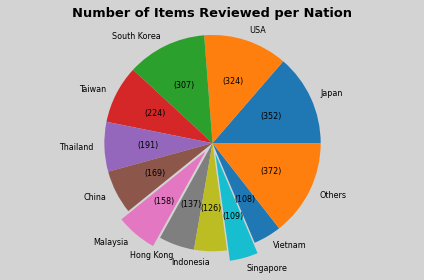

In [345]:
## Defining the plot
fig1, ax1 = plt.subplots()

## Providing Data
labels = simplify_pie_labels(list(nation_count.index.to_list()))              ## List of nation names. Matches to count.
sizes = simplify_pie_sizes(list(nation_count))                                ## List of count of nation names. Governs pie width.
explode = (0,0,0,0,0,0,.1,0,0,.1,0,0)                                         ## Malaysia and Singapore are outliers in terms of performance.

## Spec build & Format

ax1.pie(sizes, 
        labels=labels, 
        explode=explode, 
        textprops=label, 
        autopct=make_autopct(sizes),                                          ## Calling helper function for whole number slice labelling 
        startangle=0)
ax1.axis('equal')
ax1.set_title('Number of Items Reviewed per Nation', fontdict=title)

## Under formatting
fig1.set_facecolor('lightgrey')

## Display
plt.tight_layout()
plt.show()

## Baking a Pie

The plot is defined. 

Data is provided, funneling through the simplification functions. 

Formatting is performed, labelling each slice with the number of items it represents. 

Nations with less than 100 items reviewed are placed in an 'Other' slice. 

Dictionary provides formatting data